In [1]:
import tifffile as tf
import numpy as np
from skimage.feature import peak_local_max
from skimage.filters import gaussian
from matplotlib import pyplot as plt
from trapanalysis import TrapGetter

(1, 1, 2)


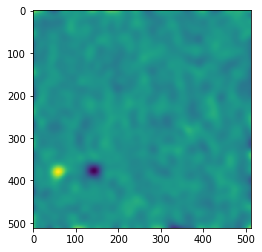

frame of movement  581
[[377 143]]
[[377 143]]
(1, 1, 2)


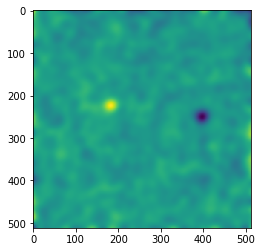

frame of movement  647
(1, 1, 2)


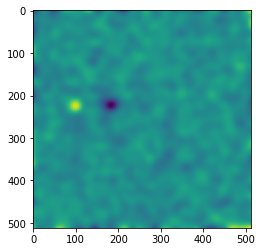

frame of movement  648
(1, 1, 2)


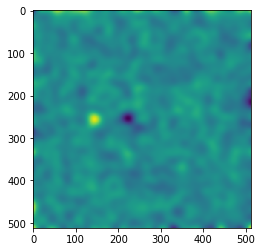

frame of movement  737
(1, 2, 2)
[[52 62]]
[[52 62]]
[[ True False]]


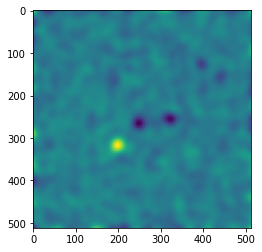

frame of movement  885
(1, 1, 2)


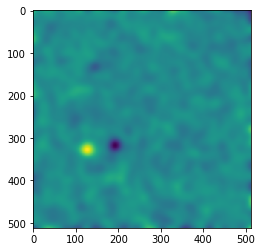

frame of movement  906
(1, 1, 2)


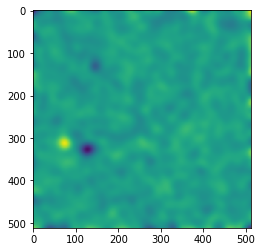

frame of movement  907
(1, 1, 2)


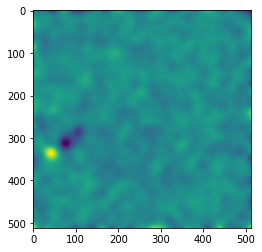

frame of movement  961


In [10]:
tif = tf.TiffFile('/home/mjsf3/TrapAnalysis/260522_CecB-  PCPG vesicles- after flushing_1_MMStack_Pos31.ome-1.tif')

frames = tif.asarray()

subtracted_frames = frames[:-1] - frames[1:]


interficiendum = None
for frame_index in range(126,1326):
    frame = subtracted_frames[frame_index]
    
    frame = gaussian(frame,10)
    pos_peaks = peak_local_max(frame,min_distance=40,threshold_rel=0.95)
    neg_peaks = peak_local_max(np.max(frame)-frame,min_distance=40,threshold_rel=0.95)
    
    pos_peaks = np.array(pos_peaks)
    neg_peaks = np.array(neg_peaks)
    
    
    
    peaks = np.vstack((pos_peaks,neg_peaks))
    
    
    if len(pos_peaks) >0 and len(neg_peaks) > 0:
        
        #if we find a positive and a negative peak in the subtracted frame, we believe that a vesicle has moved
        #remains to pair the negative peak and positive peak to make sure a vesicle moved and didnt just burst
        
        pair_vectors = pos_peaks[np.newaxis] - neg_peaks
        print(pair_vectors.shape)
        if pair_vectors.shape[1] ==1:
            plt.imshow(frame)
            plt.show()
            print('frame of movement ', frame_index)
            if interficiendum is None:
                interficiendum = neg_peaks
                print(neg_peaks)
                print(interficiendum)
            else:
                interficiendum = np.vstack((interficiendum,neg_peaks))
                
        else:
            pair = pair_vectors[np.absolute(pair_vectors[:,:,0]) < 60]
            print(pair_vectors[:,:,0])
            
            if pair_vectors.shape[1] == 1:
                plt.imshow(frame)
                plt.show()
                print('frame of movement ', frame_index)
                if interficiendum is None:
                    interficiendum = neg_peaks[pair_vectors[:,0] < 60]
                    
                else:
                    interficiendum = np.vstack(interficiendum,neg_peaks[pair_vectors[:,0] < 60])  
                    
            else:
                pair = pair_vectors[pair_vectors[:,:,1] < 0]
                pair = pair[pair[:,0] < 60]
                
                #if there is at least a pair of positive and negative peaks which are vertically less than 60 pixels away and arranged horizontally so the positive peak is on the left
                 #then we choose to bin the vesicle which in the previous frame was in the position of the nearest negative peak to a positive peak
                    
                if len(neg_peaks) > 1 and len(pair[0]) > 0:
                    print(pair_vectors[:,:,0])
                    print([np.absolute(pair_vectors[:,:,0]) == np.min(np.absolute(pair_vectors[:,:,0]))][0])
                    peak = neg_peaks[[np.absolute(pair_vectors[:,:,0]) == np.min(np.absolute(pair_vectors[:,:,0]))][0][0]]
                    
                else:
                    peak = neg_peaks                    
                
                    
                plt.imshow(frame)
                plt.show()
                print('frame of movement ', frame_index)
                if interficiendum is None:
                    interficiendum = peak
                else:
                    interficiendum = np.vstack((interficiendum,peak))
                        



In [17]:
TG = TrapGetter()
initial_detect_frame = 126
frame = tif.asarray(key = initial_detect_frame)

TG.get_vesicle_positions(frame)
TG.remove_duplicates()
TG.trap_positions += [0,5]

separations = TG.trap_positions[:,:,np.newaxis] - interficiendum.T
separations = np.linalg.norm(separations,axis = 1)

In [18]:
killlabels = TG.labels[np.sum(separations < np.sqrt(2*15**2), axis = 1) == True]
killlabels

array([19, 35, 37])

In [14]:
print(TG.trap_positions)

[[503  70]
 [500 333]
 [495 400]
 [493 485]
 [475  30]
 [467 112]
 [466 194]
 [465 359]
 [465 286]
 [464 444]
 [440 235]
 [436 317]
 [411  23]
 [407 192]
 [406 274]
 [405 356]
 [402 201]
 [378 320]
 [377 148]
 [376 401]
 [376 231]
 [349  23]
 [347 106]
 [346 191]
 [344 273]
 [343 357]
 [314 230]
 [313 403]
 [313 150]
 [288  21]
 [286 105]
 [284 188]
 [283 270]
 [282 357]
 [257 242]
 [256  62]
 [250 399]
 [229  32]
 [221 355]
 [192 229]
 [189 152]
 [187 238]
 [176 505]
 [165 198]
 [163 102]
 [157 439]
 [132 144]
 [131 228]
 [129 313]
 [128 397]
 [ 99 270]
 [ 98 352]
 [ 71 146]
 [ 67 397]
 [ 65 479]
 [ 42 103]
 [ 40 186]]


In [21]:
images = tif.asarray()

In [22]:
images

array([[[   11,    20, 65515, ..., 65497,    12,    21],
        [65451, 65447, 65447, ...,    27, 65447, 65462],
        [   49,    24,    58, ...,    48, 65451,   127],
        ...,
        [   58, 65446, 65501, ..., 65441, 65504,   208],
        [65484, 65514,    40, ..., 65510,    96,    21],
        [  133, 65454,     1, ..., 65523, 65469, 65416]],

       [[65421, 65448,     2, ...,     3, 65510, 65519],
        [    2,    22, 65453, ...,    37,   103,    48],
        [65480, 65482, 65494, ..., 65504,    20, 65389],
        ...,
        [65485,    11, 65495, ..., 65517, 65443, 65483],
        [   57,    29, 65531, ..., 65530, 65478, 65421],
        [   25,    93,    62, ..., 65496,   111,    90]],

       [[   62,    43,    84, ..., 65525,     3, 65430],
        [65525,    79,   194, ..., 65438, 65523, 65455],
        [65402,     9, 65435, ...,    11,    18,    38],
        ...,
        [   54,    23,    71, ...,    98,    31,    13],
        [65481, 65409, 65506, ..., 65493, 654

In [11]:
tif.asarray().shape

(512, 512)

In [ ]:
np.savetxt(X=images,f)